<a href="https://colab.research.google.com/github/davibernardes035/EDA-covid19/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

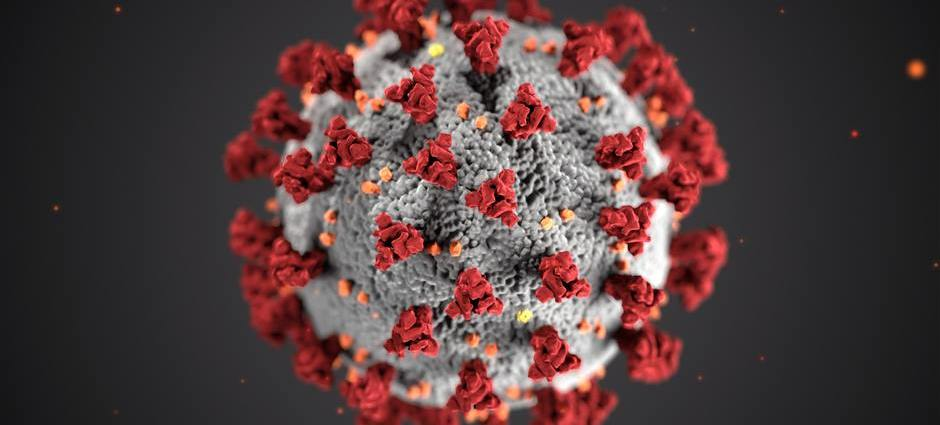

## Relatório de análise da base de dados de COVID-19

A base de dados analisada nesta atividade contém informações a respeito de 194 pessoas que tiveram algum tipo de contato com o vírus COVID-19. Nesse sentido, é possível observar dados como: Teste de anticorpos, sexo, infecção, sintomas, vacinas, além de outras informações relevantes para a nossa análise.

###**Inicialmente é realizada a importação das bibliotecas e o carregamento da base a ser analisada**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from math import sqrt
import pandas as pd
import datetime
from datetime import datetime
from numpy import mean, std, median
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = "/content/drive/MyDrive/DADOS_EDA/dadosCovid.xlsx"

df = pd.read_excel(data)

### **Algumas informações úteis**

Para auxiliar na compreensão dos dados, exibimos o nome e tipo de cada coluna da base, além da quantidade de colunas e linhas.

In [ ]:
#Observamos aqui os tipos dos dados presentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Nome completo                                                  194 non-null    object
 1   Teste                                                          194 non-null    object
 2   Nascimento                                                     194 non-null    object
 3   Sexo                                                           194 non-null    object
 4   Infecção                                                       194 non-null    object
 5   Há quanto tempo?                                               125 non-null    object
 6   Sintomas                                                       108 non-null    object
 7   Se já teve Covid-19, qual foi o método usado para diagnóstico  108 non-

In [ ]:
#Quantas linhas e instâncias o conjunto de dados possui
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Linhas: 194
Colunas: 11


In [ ]:
#Observando a base de dados
df.head()

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,"Se já teve Covid-19, qual foi o método usado para diagnóstico",Vacinas,Unnamed: 9,Última imunização?
0,Pessoa 1,IgG(-) IgM(-),1997-09-15 00:00:00,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-
1,Pessoa 2,IgG(+) IgM(+),2000-11-04 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-18 00:00:00
2,Pessoa 3,IgG(+) IgM(-),2002-03-07 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-31 00:00:00
3,Pessoa 4,IgG(-) IgM(-),2000-09-14 00:00:00,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-
4,Pessoa 5,IgG(-) IgM(-),1997-01-23 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 2 doses",Coronavac,2021-04-01 00:00:00


# 1. Quantas pessoas foram analisadas ao todo (homens e mulheres)?




A contagem foi realizada verificando o número de registros que o campo "Sexo" possui. Dessa maneira foi possível observar um total de 194 pessoas, tanto homens quanto mulheres, que provavelmente passaram por uma série de exames e entrevistas contribuindo com a coleção dos dados.

In [ ]:
count_pessoas = df['Sexo'].count()
print(f"Numero de total pessoas: {count_pessoas}")

Numero de total pessoas: 194


# 2. Mostre o percentual de mulheres e homens.

A análise da distribuição de gênero da base de dados revelou informações valiosas sobre a composição da população que passou pelos testes de COVID-19. Com um total de 194 indivíduos, 59 deles são do sexo masculino, o que representa aproximadamente 30.41% do conjunto de dados. Por outro lado, 135 indivíduos são do sexo feminino, o que corresponde a uma significativa proporção de 69.59%.
Essa diferença substancial entre os gêneros nos chama a atenção e merece uma investigação mais aprofundada em análises posteriores. A predominância de mulheres em nossa amostra pode sugerir uma tendência na procura de testes de COVID-19 ou uma maior exposição ao vírus. Entender a distribuição de gênero pode ser crucial na formulação de políticas de saúde e na implementação de estratégias de testagem.

No gráfico é possível notar a proporção que há nessa diferença entre a distribuição de gênero.

Quantidade de homens: 59
Quantidade de mulheres: 135
Porcentagem de pessoas do sexo masculino: 30.41%
Porcentagem de pessoas do sexo feminino: 69.59%


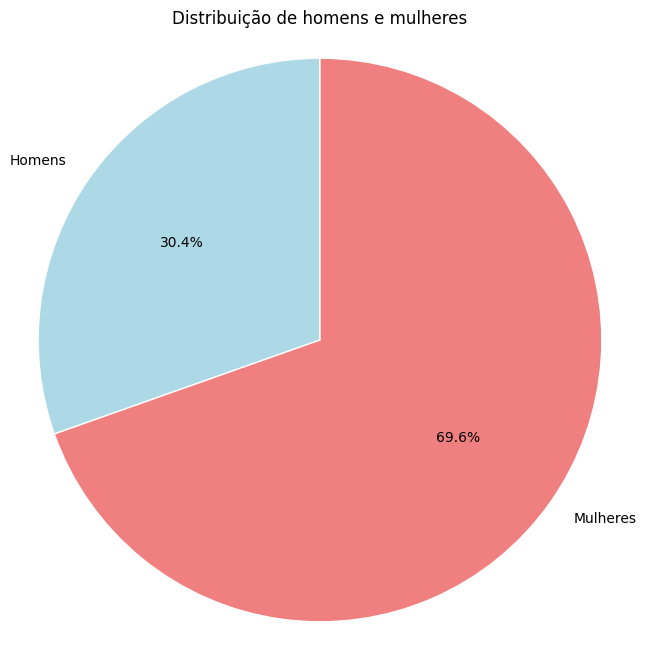

In [ ]:
count_sexos = df['Sexo'].value_counts()

# Trecho para armazenar a contagem em variáveis separadas
contagem_masculino = count_sexos.get('Masculino', 0)
contagem_feminino = count_sexos.get('Feminino', 0)

porcentagem_masculino = (contagem_masculino / len(df) ) * 100
porcentagem_feminino = (contagem_feminino / len(df)) * 100

# Exibindo as porcentagens individuais
print(f"Quantidade de homens: {contagem_masculino}")
print(f"Quantidade de mulheres: {contagem_feminino}")
print(f"Porcentagem de pessoas do sexo masculino: { porcentagem_masculino :.2f}%")
print(f"Porcentagem de pessoas do sexo feminino: { porcentagem_feminino :.2f}%")

# Preparando um data frame para exibir no gráfico
data = {'Sexo': ['Homens', 'Mulheres'], 'Percentual': [porcentagem_masculino, porcentagem_feminino]}
data_frame = pd.DataFrame(data)

cores = ['lightblue', 'lightcoral']

# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data_frame['Percentual'], labels=data_frame['Sexo'], autopct='%1.1f%%', colors=cores, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Distribuição de homens e mulheres')

plt.axis('equal')
plt.show()

# 3. Avaliação da idade da amostra?

A análise da idade da amostra revela uma distribuição variada de idades entre os indivíduos que passaram pelos testes de COVID-19. Abaixo, apresentamos as idades encontradas na amostra, juntamente com a quantidade de pessoas correspondente em cada faixa etária:

* A faixa etária mais comum na base de dados é de 21 anos, com um total de 35 pessoas nessa faixa.
* Também observamos uma concentração notável de pessoas com 25 anos, com 23 pessoas nessa idade.

* Além disso, as faixas etárias de 20 anos, 22 anos e 24 anos são igualmente representadas com cerca de 20 pessoas em cada faixa.

* Em contraste, há faixas etárias menos representadas, como 30, 32, 34, 35, 42, 43 e 48 anos, onde há apenas uma ou duas pessoas em cada faixa.

Essa distribuição diversificada de idades pode fornecer informações importantes sobre a amostra e suas características demográficas. É importante considerar essas diferenças de idade ao realizar análises mais aprofundadas, como a relação entre a idade e os resultados dos testes de COVID-19, a eficácia das medidas de prevenção em diferentes faixas etárias, entre outros fatores relevantes.

Idade mais recorrente: 21.0 anos
 Idade  Quantidade de Pessoas
   0.0                      2
  19.0                      7
  20.0                     20
  21.0                     35
  22.0                     20
  23.0                     18
  24.0                     21
  25.0                     23
  26.0                     19
  27.0                      4
  28.0                      4
  29.0                      7
  30.0                      1
  31.0                      2
  32.0                      1
  34.0                      1
  35.0                      2
  42.0                      1
  43.0                      1
  48.0                      1


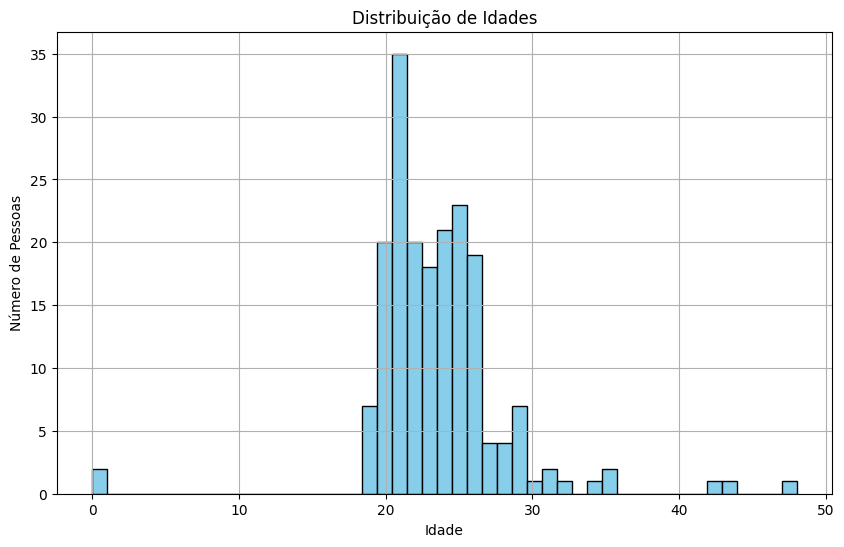

In [ ]:
# Alterando o formato da coluna Nascimento para o formato do tipo dates, facilitando o trabalho.
# Também, na linha seguinte iremos corrigir os erros de formação e de escrita, como: dias que não existem.
df['Nascimento'] = pd.to_datetime(df['Nascimento'], errors='coerce', dayfirst=True)

# Calcula as idades com base na data de nascimento
hoje = datetime.now()
df['Idade'] = hoje - df['Nascimento']
df['Idade'] = df['Idade'] // pd.Timedelta(days=365)  # Converte a diferença para anos

print(f"Idade mais recorrente: {df['Idade'].mode().values[0]} anos")

contagem_idades = df['Idade'].value_counts().reset_index()
contagem_idades.columns = ['Idade', 'Quantidade de Pessoas']

# Classifique o DataFrame pela idade
contagem_idades = contagem_idades.sort_values(by='Idade')

# Imprima o DataFrame
print(contagem_idades.to_string(index=False))


# Histograma para visualizar a distribuição das idades
plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=47, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Idades')
plt.grid(True)
plt.show()

# 4. Qual é o indivíduo mais velho e mais novo?

Dentro do conjunto de dados analisado, identificamos o indivíduo mais velho e o mais novo:

* O indivíduo mais velho, identificado como Pessoa 68, nasceu em 19 de setembro de 1975, tornando-se o mais experiente na amostra com a idade de 48 anos.

* O indivíduo mais novo, conhecido como Pessoa 88, nasceu em 11 de setembro de 2023, o que implica que este indivíduo tem apenas 0 anos.

Essas informações sobre o indivíduo mais velho e mais novo na amostra destacam a ampla variação nas idades dos participantes e podem ser relevantes para análises adicionais relacionadas à COVID-19

In [ ]:
# Econtrando a pessoa mais velha
pessoa_mais_velha = df[df['Nascimento'] == df['Nascimento'].min()]
nome_mais_velha = pessoa_mais_velha['Nome completo'].values[0]
data_nascimento_mais_velha = pd.to_datetime(pessoa_mais_velha['Nascimento'].values[0]).strftime('%d-%m-%Y') #Formato que utilizamos no Brasil para ficar mais fácil a vizualização
idade_pessoa_mais_velha = pessoa_mais_velha['Idade'].values[0]

print(f"O individuo mais velho é: {nome_mais_velha} e nasceu em: {data_nascimento_mais_velha} e possui {idade_pessoa_mais_velha} anos")

# Econtrando a pessoa mais nova

pessoa_mais_nova = df[df['Nascimento'] == df['Nascimento'].max()]
nome_mais_nova = pessoa_mais_nova['Nome completo'].values[0]
data_nascimento_mais_nova = pd.to_datetime(pessoa_mais_nova['Nascimento'].values[0]).strftime('%d-%m-%Y')
idade_pessoa_mais_nova = pessoa_mais_nova['Idade'].values[0]

print(f"O individuo mais novo é: {nome_mais_nova} e nasceu em: {data_nascimento_mais_nova} e possui {idade_pessoa_mais_nova} anos")

O individuo mais velho é: Pessoa 68 e nasceu em: 19-09-1975 e possui 48.0 anos
O individuo mais novo é: Pessoa 88 e nasceu em: 11-09-2023 e possui 0.0 anos


# 5. Quantas pessoas apresentaram IgG(+) IgM(-)? Separe por sexo

Primeiramente, **IgG(+) IgM(-)** refere-se a resultados de testes sorológicos para anticorpos no sangue de uma pessoa em relação ao vírus SARS-CoV-2, que causa a COVID-19. Aqui está o significado de cada componente:

* **IgG(+)** indica a presença de anticorpos do tipo IgG específicos para o SARS-CoV-2. IgG é um tipo de anticorpo que o sistema imunológico produz em resposta a uma infecção passada. A presença de IgG sugere que a pessoa pode ter sido exposta ao vírus no passado e desenvolveu uma resposta imunológica.

* **IgM(-)** indica a ausência de anticorpos do tipo IgM específicos para o SARS-CoV-2. IgM é outro tipo de anticorpo que é produzido em resposta a infecções recentes. A ausência de IgM sugere que a pessoa não está atualmente infectada pelo vírus.

Ao analisar os resultados dos testes sorológicos, observamos que 126 indivíduos do sexo feminino e 57 indivíduos do sexo masculino apresentaram resultados de **IgG(+) IgM(-)**. Isso significa que essas pessoas desenvolveram anticorpos IgG específicos para o SARS-CoV-2, indicando uma possível exposição passada ao vírus, enquanto não demonstraram a presença de anticorpos IgM, sugerindo que não estavam infectadas no momento da realização dos testes.

           Teste
Sexo            
Feminino     126
Masculino     57


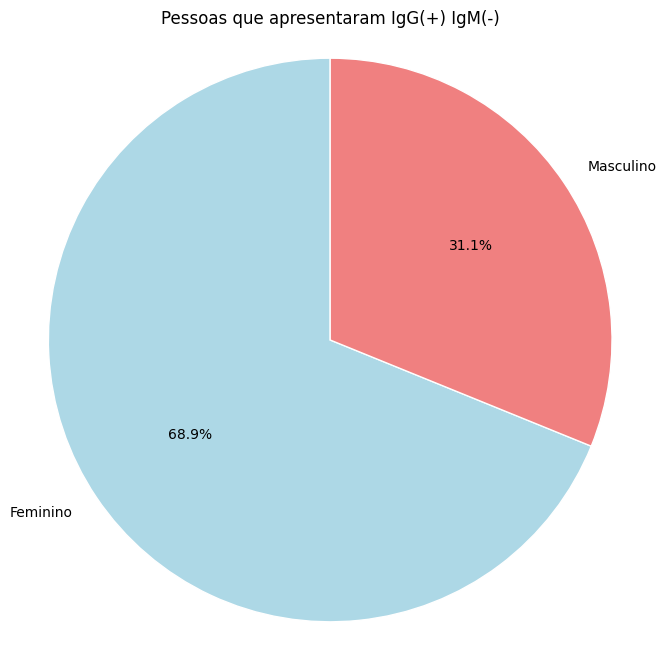

In [ ]:
filtro1 = (df['Teste'] == 'IgG(+) IgM(-)') #Filtro utilizado para capturar somente o dado que queremos

# Contar o número de ocorrências para cada combinação de 'Sexo' e 'Teste'
contagem_ex5 = df[filtro1].pivot_table(index='Sexo', values='Teste', aggfunc='count', fill_value=0)

print(contagem_ex5)

# Preparando os dados para exibir no gráfico
labels = contagem_ex5.index
values = contagem_ex5['Teste']

cores = ['lightblue', 'lightcoral']

# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=cores, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Pessoas que apresentaram IgG(+) IgM(-)')

plt.axis('equal')
plt.show()

# 6. Quantas pessoas apresentaram IgG(-) IgM(-)? Separe por sexo.

Ao analisar os resultados dos testes sorológicos, identificamos que 8 indivíduos do sexo feminino e 2 indivíduos do sexo masculino apresentaram resultados de IgG(-) IgM(-). Isso indica a ausência de anticorpos IgG e IgM específicos para o SARS-CoV-2, sugerindo que essas pessoas não desenvolveram uma resposta imunológica ao vírus no momento dos testes.

           Teste
Sexo            
Feminino       8
Masculino      2


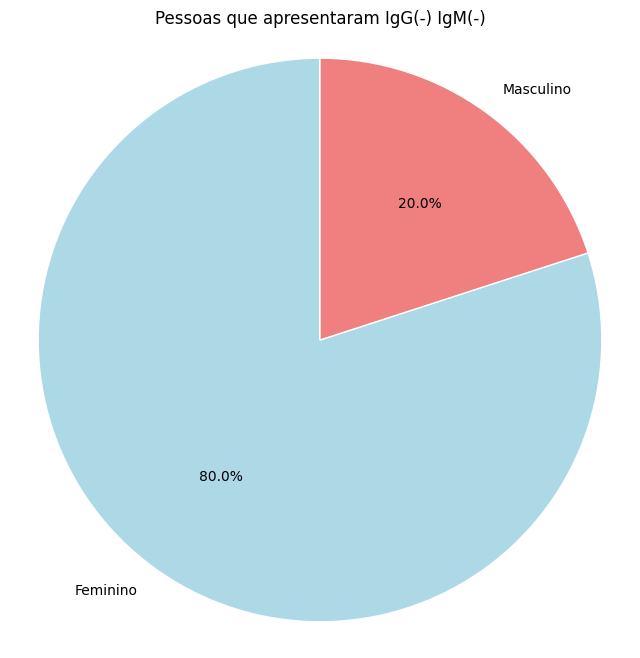

In [ ]:
filtro2 = (df['Teste'] == 'IgG(-) IgM(-)')

# Contar o número de ocorrências para cada combinação de 'Sexo' e 'Teste'
contagem_ex6 = df[filtro2].pivot_table(index='Sexo', values='Teste', aggfunc='count', fill_value=0)

print(contagem_ex6)

# Preparando os dados para exibir no gráfico
labels = contagem_ex6.index
values = contagem_ex6['Teste']

cores = ['lightblue', 'lightcoral']

# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=cores, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Pessoas que apresentaram IgG(-) IgM(-)')

plt.axis('equal')
plt.show()

# 7. Quantas pessoas apresentaram IgG(+) IgM(+)? Separe por sexo.

Após a análise dos resultados dos testes sorológicos, constatamos que apenas 1 indivíduo do sexo feminino apresentou resultados de **IgG(+) IgM(+)**. Isso indica que esta pessoa desenvolveu anticorpos IgG e IgM específicos para o SARS-CoV-2, sugerindo que ela teve uma infecção recente ou ainda está infectada no momento dos testes.

Embora este seja um resultado pouco comum na amostra, ele é importante para a compreensão da situação de saúde desse indivíduo em particular. É fundamental monitorar de perto esse caso e, se necessário, tomar as medidas apropriadas para garantir a saúde da pessoa e evitar a disseminação do vírus.

In [ ]:
filtro3 = (df['Teste'] == 'IgG(+) IgM(+)')

# Contar o número de ocorrências para cada combinação de 'Sexo' e 'Teste'
contagem_ex7 = df[filtro3].pivot_table(index='Sexo', values='Teste', aggfunc='count', fill_value=0)

print(contagem_ex7)


          Teste
Sexo           
Feminino      1


A princípio, este retorno é intrigante, pois apresenta somente um resultado. Porém, podemos ter a confirmação observando a base de dados pelo excel, então percebemos que a célula deste dado apresenta uma cor em destaque, indicando a individualidade.

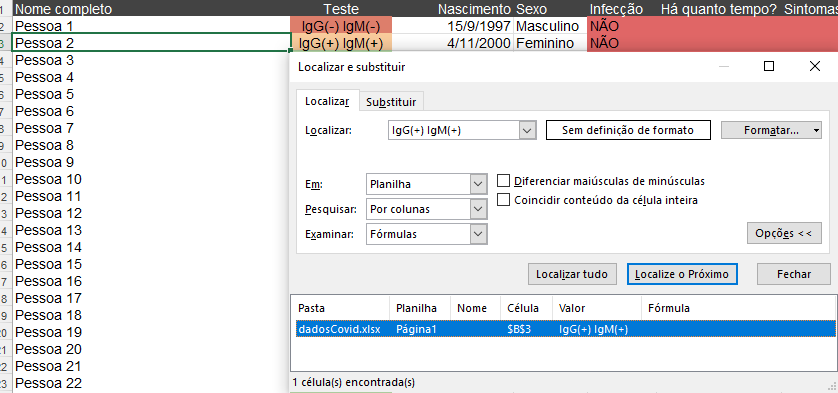

# 8. Quantas pessoas apresentaram infeccção? Separe por sexo.

Ao analisar os resultados dos testes de infecção, observamos que 74 indivíduos do sexo feminino e 32 indivíduos do sexo masculino testaram positivo para a infecção. Isso significa que essas pessoas tiveram resultados indicando uma infecção pelo vírus SARS-CoV-2, com a resposta 'SIM'.

O total de pessoas com infecção é de 106, o que representa um número significativo dentro da amostra. Essa informação é crucial para compreender a prevalência da infecção na população analisada, destacando a importância de medidas de prevenção, rastreamento e tratamento adequados para controlar a disseminação do vírus.

A análise por sexo também revela diferenças na proporção de infecção entre os sexos, com um número maior de casos positivos no sexo feminino. Essa discrepância pode ser devido a várias razões, incluindo diferenças na exposição ao vírus, comportamentos de prevenção e fatores demográficos.

In [ ]:
# filtro para 'SIM'
filtro_sim = df['Infecção'] == 'SIM'

# ocorrências de 'SIM' e 'NÃO' separadamente, agrupando por sexo
contagem_sim = df[filtro_sim].groupby('Sexo')['Infecção'].count().reset_index(name='Quantidade')
total = df[filtro_sim].count()

# Imprima o resultado
print("Quantidade de pessoas com 'SIM': ")
print(contagem_sim)
print(f"Total de pessoas com infecção: {total['Sexo']}")



Quantidade de pessoas com 'SIM': 
        Sexo  Quantidade
0   Feminino          74
1  Masculino          32
Total de pessoas com infecção: 106


Em seguida vamos ver o gráfico das porcentagens correspondentes

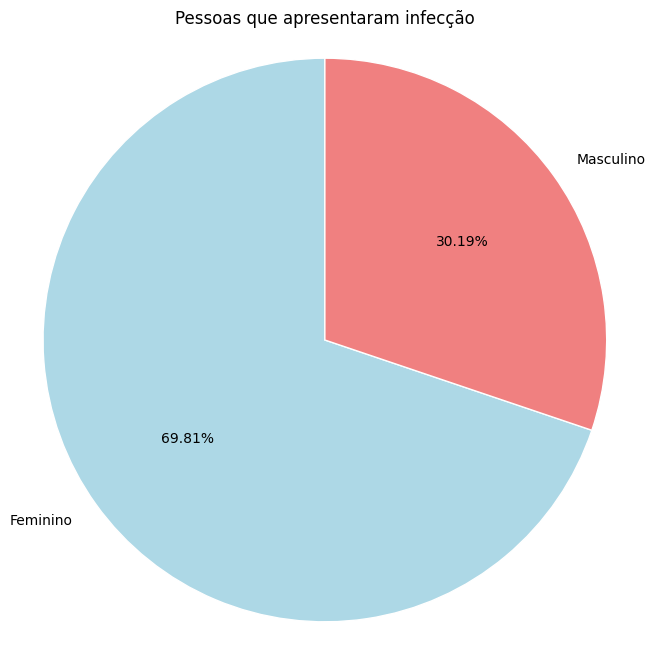

In [ ]:
# Preparando os dados para exibir no gráfico
labels = contagem_sim['Sexo']
values = contagem_sim['Quantidade']

cores = ['lightblue', 'lightcoral']

# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(values, labels=labels, autopct='%1.2f%%', colors=cores, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Pessoas que apresentaram infecção')

plt.axis('equal')
plt.show()

# 9. Quais foram os principais sintomas sentidos pelas pessoas imunizadas?

Após uma análise dos registros das pessoas imunizadas, identificamos os principais sintomas relatados. Abaixo está a lista dos 15 principais sintomas e a quantidade de pessoas que os relataram:

* Tosse: 52 pessoas
* Dor no corpo: 44 pessoas
* Febre: 41 pessoas
* Cansaço excessivo: 38 pessoas
* Dor de garganta: 35 pessoas
* Calafrios: 25 pessoas
* Anosmia (perda do olfato): 20 pessoas
* Assintomático: 16 pessoas
* Ageusia (perda do paladar): 15 pessoas
* Dificuldade de respirar: 14 pessoas
* Diarreia: 9 pessoas
* Dor ou pressão no peito: 8 pessoas
* Dor no corpo: 5 pessoas
* Vômito: 4 pessoas
* Dispneia (falta de ar): 3 pessoas

Essa informação é relevante para entender os sintomas mais comuns entre as pessoas imunizadas e pode ser útil para a identificação precoce de sintomas associados à COVID-19. No entanto, é importante lembrar que a experiência de sintomas pode variar amplamente entre indivíduos e que nem todos os casos de sintomas estão relacionados à infecção pelo SARS-CoV-2.

In [ ]:
# Filtrar as linhas por pessoas imunizadas, ou seja, que já tomaram vacinas.
pessoas_imunizadas = df[df['Vacinas'] != 'NÃO'].copy()

# convertendo os valores da coluna 'Sintomas' em strings, pois os dados estavam em diferente tipos, dificultando na analise.
pessoas_imunizadas = pessoas_imunizadas.dropna(subset=['Sintomas'])
pessoas_imunizadas['Sintomas'] = pessoas_imunizadas['Sintomas'].astype(str)

# Nossa estratégia foi dividir a string de sintomas em uma lista
sintomas = [sintoma.split(', ') for sintoma in pessoas_imunizadas['Sintomas']]

# criamos uma lista de todos os sintomas
todos_os_sintomas = [s for lista in sintomas for s in lista]

# contamos a ocorrência de cada sintoma para poder verificar os que mais apresentaram
contagem_sintomas = pd.Series(todos_os_sintomas).value_counts()

# Imprimir os principais sintomas
print("Principais sintomas sentidos pelas pessoas imunizadas:")
print(contagem_sintomas.head(15))

Principais sintomas sentidos pelas pessoas imunizadas:
Tosse                      52
Dor no corpo               44
Febre                      41
Cansaço excessivo          38
Dor de garganta            35
Calafrios                  25
Anosmia                    20
Assintomático              16
Ageusia                    15
Dificuldade de respirar    14
Diarreia                    9
Dor ou pressão no peito     8
dor no corpo                5
Vomito                      4
dispneia                    3
dtype: int64


# 10. Qual foi o percentual de pessoas imunizadas sem sintomas?

Foi verificado que 44.68% das pessoas atenderam aos critérios de imunização e, ao mesmo tempo, não apresentaram sintomas relacionados à COVID-19. Esses resultados sugerem que uma parcela significativa da população estudada desenvolveu uma resposta imunológica ao SARS-CoV-2, indicando exposição passada ao vírus, sem experimentar sintomas agudos no momento da coleta dos dados.

In [ ]:
sem_sintomas = (pessoas_imunizadas['Sintomas'] == "nan").sum()

total_pessoas_imunizadas = len(pessoas_imunizadas)

print(f"Percentual de pessoas imunizadas sem sintomas: {(sem_sintomas / total_pessoas_imunizadas) * 100 :.2f}%")

Percentual de pessoas imunizadas sem sintomas: 44.68%


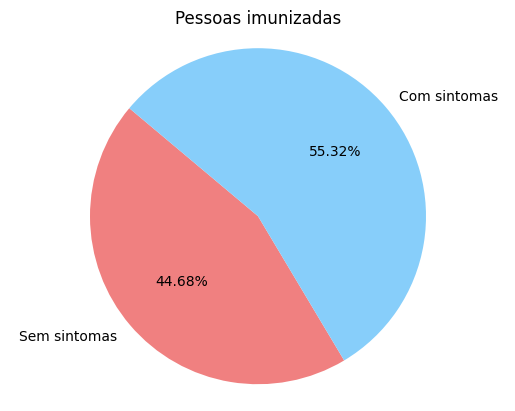

In [ ]:
porcentagem_total_pessoas_imunizadas = (sem_sintomas / total_pessoas_imunizadas) * 100
porcentagem_total_pessoas = 100 - porcentagem_total_pessoas_imunizadas

porcentagens = [porcentagem_total_pessoas_imunizadas, porcentagem_total_pessoas]

# Rótulos para as porcentagens
rotulos = ['Sem sintomas', 'Com sintomas']

# Cores para os setores
cores = ['lightcoral', 'lightskyblue']

# Crie um gráfico de pizza
plt.pie(porcentagens, labels=rotulos, colors=cores, autopct='%1.2f%%', startangle=140)

# Adicione um título
plt.title('Pessoas imunizadas')

# Exiba o gráfico
plt.axis('equal')  # Assegura que o gráfico seja uma circunferência
plt.show()

# 11. Qual foi o imunizante mais utilizado?

In [ ]:
#Renomeando a coluna de imunizante, para facilitar o trabalho com os dados
df.rename(columns={'Unnamed: 9': 'Imunizantes'}, inplace=True)
df.head()

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,"Se já teve Covid-19, qual foi o método usado para diagnóstico",Vacinas,Imunizantes,Última imunização?,Idade
0,Pessoa 1,IgG(-) IgM(-),1997-09-15,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-,26.0
1,Pessoa 2,IgG(+) IgM(+),2000-11-04,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-18 00:00:00,23.0
2,Pessoa 3,IgG(+) IgM(-),2002-03-07,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-31 00:00:00,21.0
3,Pessoa 4,IgG(-) IgM(-),2000-09-14,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-,23.0
4,Pessoa 5,IgG(-) IgM(-),1997-01-23,Feminino,NÃO,NaN,NaN,NaN,"SIM, 2 doses",Coronavac,2021-04-01 00:00:00,26.0


Foi realizado uma análise para determinar qual imunizante foi o mais amplamente utilizado em nossa população-alvo. Os dados foram consolidados após a padronização dos nomes dos imunizantes, resultando na seguinte distribuição:

* Pfizer: 98 doses
* AstraZeneca: 64 doses
* Coronavac: 45 doses
* Janssen: 10 doses
* Não especificado: 6 doses

Observando esses dados, é evidente que o imunizante da Pfizer foi o mais amplamente utilizado, totalizando 98 doses em nossa base. A AstraZeneca e a Coronavac também foram amplamente aplicadas, com 64 e 45 doses, respectivamente. A vacina Janssen teve 10 doses registradas.

In [ ]:
#definindo uma função para que a função split separe com mais parâmetros.
def split_multiple(value):
    return value.split(',') if ',' in value else value.split(' e ')

#Contando os imunizantes
nomes_imunizantes = df['Imunizantes'].apply(split_multiple)

todos_os_imunizantes = [s for lista in nomes_imunizantes for s in lista]

contagem_imunizantes = pd.Series(todos_os_imunizantes).value_counts()

print(contagem_imunizantes)

Pfizer                               93
Astrazeneca                          51
Coronavac                            39
Astrazenica                          12
Janssen                               9
-                                     6
 Coronavac                            5
 Pzifer e Janssen                     3
 Pfizer                               2
 Astrazeneca                          1
Asrrazenica                           1
 Astrazenica                          1
Astrazeneca tambem                    1
Jansen                                1
Pfizer + bivalente na ultima dose     1
E Pfizer na 3                         1
Oxford- Fiocruz                       1
 Astrazeneca e Janssen                1
Coronavac astrazenica janssen         1
Astrzeneca                            1
dtype: int64


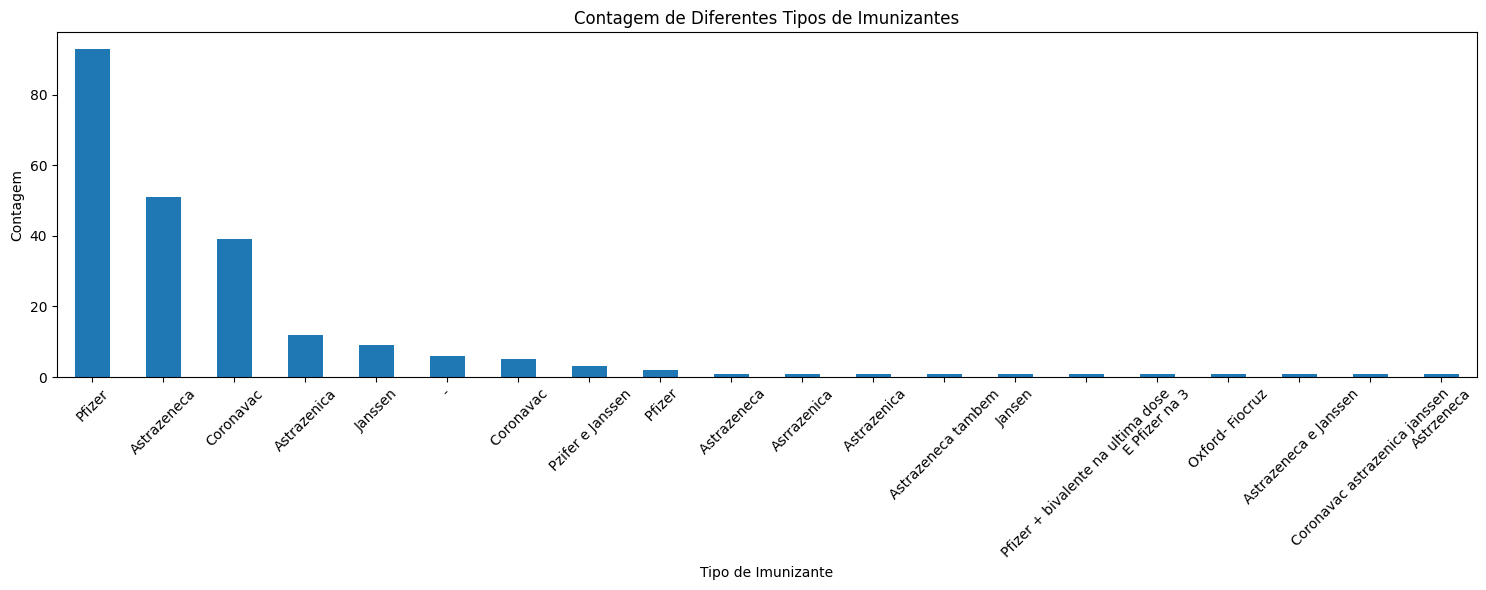

In [ ]:
plt.figure(figsize=(15, 6))  # Define o tamanho do gráfico
contagem_imunizantes.plot(kind='bar')
plt.title("Contagem de Diferentes Tipos de Imunizantes")
plt.xlabel("Tipo de Imunizante")
plt.ylabel("Contagem")
plt.xticks(rotation=45)  # Rotação dos rótulos no eixo x para melhor visualização
plt.tight_layout()

# 12. Qual imunizante apresentou mais sintomas?

In [ ]:
# Removendo as entradas com strings "NaN" na coluna 'Sintomas'
df2 = df[df['Sintomas'] != 'NaN']

# Aqui utilizamos outra alternativa para separar os diferentes imunizantes, a função .explode()
imunizantes = df2['Imunizantes'].explode()

# Contando a ocorrência de sintomas para cada tipo de imunizante
contagem_sintomas_por_imunizante = df2.groupby(imunizantes)['Sintomas'].count()

# Verificando se a sequência não está vazia
if not contagem_sintomas_por_imunizante.empty:
    # Encontrando o tipo de imunizante com o maior número de sintomas
    imunizante_com_mais_sintomas = contagem_sintomas_por_imunizante.idxmax()
    quantidade_mais_sintomas = contagem_sintomas_por_imunizante.max()

    print(f"O imunizante que apresentou mais sintomas foi {imunizante_com_mais_sintomas} com {quantidade_mais_sintomas} sintomas relatados.")


O imunizante que apresentou mais sintomas foi Pfizer com 44 sintomas relatados.


Podemos obersarvar mais claramente por meio do gráfico a seguir que o imunizante que apresentou mais sintomas foi Pfizer

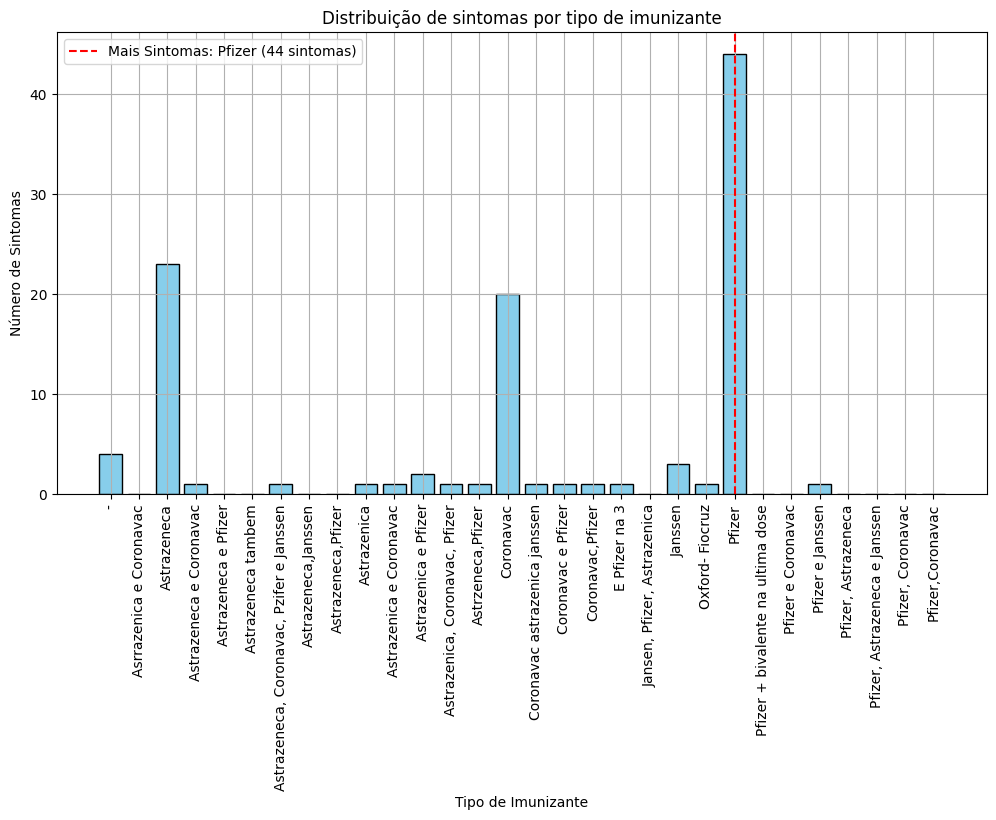

In [ ]:
# Cria um histograma para mostrar a distribuição de sintomas por tipo de imunizante
plt.figure(figsize=(12, 6))
plt.bar(contagem_sintomas_por_imunizante.index, contagem_sintomas_por_imunizante.values, color='skyblue', edgecolor='black')
plt.xlabel('Tipo de Imunizante')
plt.ylabel('Número de Sintomas')
plt.title('Distribuição de sintomas por tipo de imunizante')
plt.xticks(rotation=90)  # Rotação dos rótulos no eixo x para melhor legibilidade

# Encontrando o tipo de imunizante com o maior número de sintomas
imunizante_com_mais_sintomas = contagem_sintomas_por_imunizante.idxmax()
quantidade_mais_sintomas = contagem_sintomas_por_imunizante.max()

plt.axvline(x=imunizante_com_mais_sintomas, color='red', linestyle='--', label=f'Mais Sintomas: {imunizante_com_mais_sintomas} ({quantidade_mais_sintomas} sintomas)')

plt.legend()
plt.grid(True)
plt.show()

# 13. Quantas pessoas não se vacinaram?

In [ ]:
pessoas_sem_vacina = df[df['Vacinas'] == 'NÃO']

print(f"{len(pessoas_sem_vacina)} pessoas não se vacinaram")

6 pessoas não se vacinaram


# 14. Quantas pessoas tomaram apenas uma única dose? Nesse caso, quais foram os imunizantes?

Durante a análise dos dados, identificamos que 11 pessoas receberam apenas uma única dose de um imunizante contra a COVID-19. A distribuição dessas doses por imunizante é a seguinte:

* AstraZeneca: 5 doses
* Pfizer: 4 doses
* Janssen: 2 doses

Esses resultados indicam que a maioria das pessoas que tomaram apenas uma dose receberam a vacina AstraZeneca, seguida de perto pela Pfizer e Janssen. A administração de uma única dose pode ser devido a diferentes razões, como o esquema de vacinação específico adotado em determinadas situações ou devido a casos individuais.

11 pessoas tomaram apenas uma única dose

Imunizantes
Astrazeneca    5
Pfizer         4
Janssen        2
Name: Imunizantes, dtype: int64


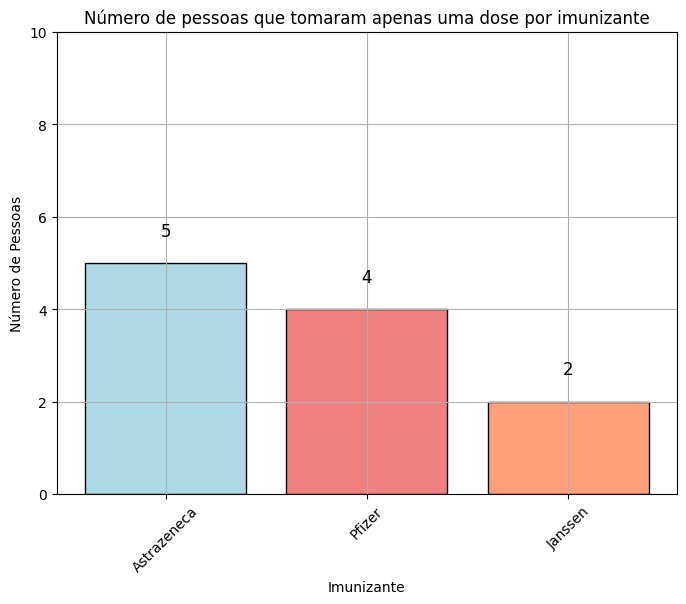

In [ ]:
unica_dose = df[df['Vacinas'] == 'SIM, 1 dose']
imunizantes_uma_dose = unica_dose['Imunizantes'].value_counts()

print(f"{len(unica_dose)} pessoas tomaram apenas uma única dose\n")
print("Imunizantes")
print(imunizantes_uma_dose)

imunizantes = imunizantes_uma_dose.index
num_pessoas = imunizantes_uma_dose.values

# Cores para os segmentos do gráfico
colors = ['lightblue', 'lightcoral', 'lightsalmon']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(imunizantes, num_pessoas, color=colors, edgecolor='black')
plt.xlabel('Imunizante')
plt.ylabel('Número de Pessoas')
plt.title('Número de pessoas que tomaram apenas uma dose por imunizante')

# Mostrar os valores acima das barras
for i, v in enumerate(num_pessoas):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Ajustar a posição vertical (eixo y) dos rótulos
plt.ylim(0, max(num_pessoas) + 5)

# Rotacionar os rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

# 15. Quantas pessoas tomaram apenas 2 doses? Nesse caso, quais foram os imunizantes?

Obtemos que 55 pessoas tomaram duas doses. Os dados foram consolidados após a padronização dos nomes dos imunizantes, resultando na seguinte distribuição:

* Pfizer: 31 doses
* Coronavac: 12 doses
* Astrazeneca: 10 doses
* Janssen: 1 dose
* Oxford - Fiocruz: 1 dose

Esses resultados indicam que a maioria das pessoas que tomaram duas doses receberam o imunizante Pfizer.

In [ ]:
duas_doses = df[df['Vacinas'] == 'SIM, 2 doses']
imunizantes_duas_doses = duas_doses['Imunizantes'].value_counts()


print(f"{len(duas_doses)} pessoas tomaram duas doses\n")
print("Imunizantes")
print(imunizantes_duas_doses)

55 pessoas tomaram duas doses

Imunizantes
Pfizer                     28
Coronavac                  12
Astrazeneca                 7
Astrazenica e Pfizer        2
Oxford- Fiocruz             1
Janssen                     1
Astrazenica e Coronavac     1
Astrazenica                 1
Pfizer, Coronavac           1
Astrzeneca,Pfizer           1
Name: Imunizantes, dtype: int64


Projetando o gráfico para termos uma observação melhor dos dados

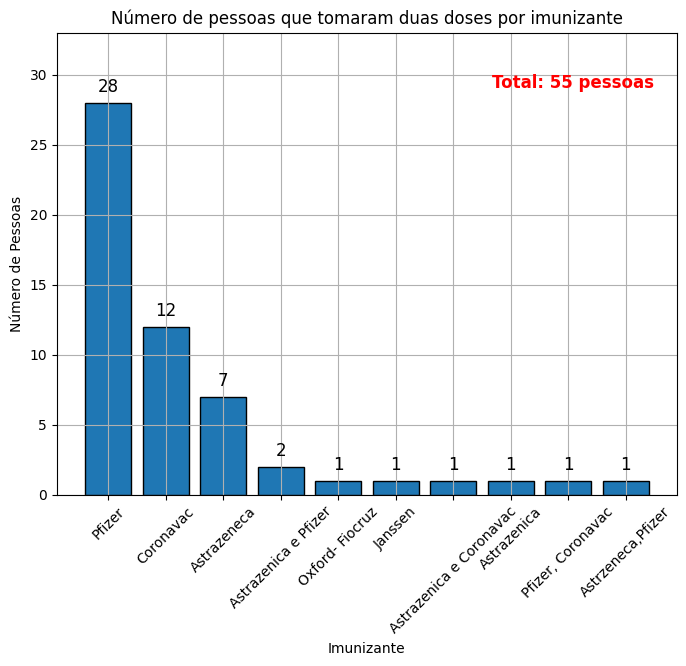

In [ ]:
imunizantes = imunizantes_duas_doses.index
num_pessoas = imunizantes_duas_doses.values

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(imunizantes, num_pessoas, edgecolor='black')
plt.xlabel('Imunizante')
plt.ylabel('Número de Pessoas')
plt.title('Número de pessoas que tomaram duas doses por imunizante')

# Mostrar os valores acima das barras
for i, v in enumerate(num_pessoas):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Ajustar a posição vertical (eixo y) dos rótulos
plt.ylim(0, max(num_pessoas) + 5)

# Adiciona um texto para mostrar a quantidade total
total_text = f'Total: {len(duas_doses)} pessoas'
plt.text(len(imunizantes) - 0.5, max(num_pessoas) + max(num_pessoas) * 0.05, total_text, ha='right', va='center', fontsize=12, color='red', fontweight='bold')

# Rotacionar os rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

# 16. Quantas pessoas tomaram 3 doses? Nesse caso, quais foram os imunizantes?

Obtemos que 75 pessoas tomaram três doses. Os dados foram consolidados após a padronização dos nomes dos imunizantes, resultando na seguinte distribuição:

* Pfizer: 29 doses
* Astrazeneca: 28 doses
* Coronavac: 17 doses
* Janssen: 1 dose

Esses resultados indicam que a maioria das pessoas que tomaram três doses receberam o imunizante Pfizer.

In [ ]:
tres_doses = df[df['Vacinas'] == 'SIM, 3 doses']
imunizantes_tres_doses = tres_doses['Imunizantes'].value_counts()

print(f"{len(tres_doses)} pessoas tomaram tres doses\n")
print("Imunizantes")
print(imunizantes_tres_doses)


75 pessoas tomaram tres doses

Imunizantes
Pfizer                         27
Astrazeneca                    18
Coronavac                      11
Astrazenica e Pfizer            4
Pfizer e Janssen                2
Asrrazenica e Coronavac         1
Pfizer,Coronavac                1
Astrazeneca e Pfizer            1
Coronavac,Pfizer                1
Astrazeneca,Janssen             1
Astrazeneca e Coronavac         1
Astrazenica e Coronavac         1
Pfizer e Coronavac              1
Coronavac e Pfizer              1
Astrazenica                     1
Jansen, Pfizer, Astrazenica     1
E Pfizer na 3                   1
Astrazeneca,Pfizer              1
Name: Imunizantes, dtype: int64


Projetando o gráfico para termos uma observação melhor dos dados

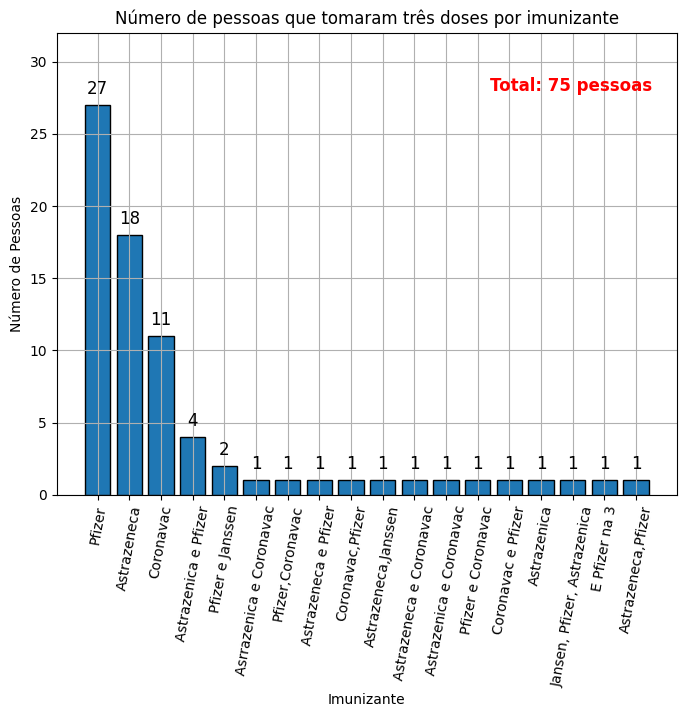

In [ ]:
imunizantes = imunizantes_tres_doses.index
num_pessoas = imunizantes_tres_doses.values

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(imunizantes, num_pessoas, edgecolor='black')
plt.xlabel('Imunizante')
plt.ylabel('Número de Pessoas')
plt.title('Número de pessoas que tomaram três doses por imunizante')

# Mostra os valores acima das barras
for i, v in enumerate(num_pessoas):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Ajusta a posição vertical (eixo y) dos rótulos
plt.ylim(0, max(num_pessoas) + 5)

# Adiciona um texto para mostrar a quantidade total
total_text = f'Total: {len(tres_doses)} pessoas'
plt.text(len(imunizantes) - 0.5, max(num_pessoas) + max(num_pessoas) * 0.05, total_text, ha='right', va='center', fontsize=12, color='red', fontweight='bold')

# Rotaciona os rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=80)

plt.grid(True)
plt.show()

# 17. Quantas pessoas tomaram 4 doses? Nesse caso, quais foram os imunizantes?

E por último obtemos que 46 pessoas receberam quatro doses. Os dados foram consolidados após a padronização dos nomes dos imunizantes, resultando na seguinte distribuição:


* Astrazeneca: 17 doses
* Pfizer: 16 doses
* Coronavac: 6 doses
* Janssen: 6 doses
* Bivalente: 1 dose

Esses resultados indicam que a maioria das pessoas que tomaram três doses receberam o imunizante Astrazeneca.

In [ ]:
quatro_doses = df[df['Vacinas'] == 'SIM, 4 doses']
imunizantes_quatro_doses = quatro_doses['Imunizantes'].value_counts()

print(f"{len(quatro_doses)} pessoas tomaram quatro doses\n")
print("Imunizantes")
print(imunizantes_quatro_doses)


46 pessoas tomaram quatro doses

Imunizantes
Astrazeneca                                 13
Pfizer                                      12
Coronavac                                    6
Janssen                                      3
Astrazeneca, Coronavac, Pzifer e Janssen     3
Coronavac astrazenica janssen                1
Pfizer, Astrazeneca e Janssen                1
Pfizer + bivalente na ultima dose            1
Astrazeneca tambem                           1
Coronavac e Pfizer                           1
Astrazenica e Pfizer                         1
Astrazenica, Coronavac, Pfizer               1
Astrazeneca e Pfizer                         1
Pfizer, Astrazeneca                          1
Name: Imunizantes, dtype: int64


Projetando o gráfico para termos uma observação melhor dos dados

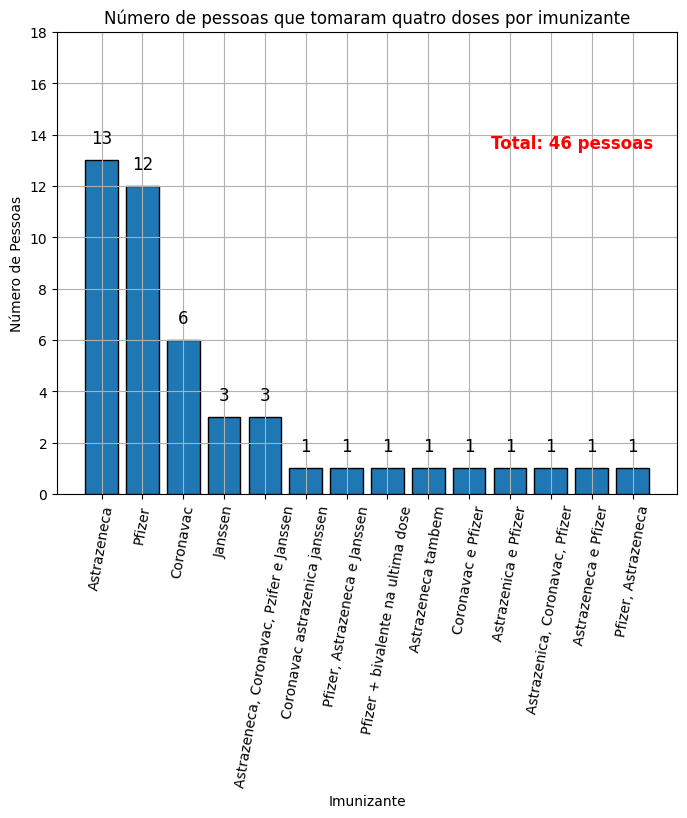

In [ ]:
imunizantes = imunizantes_quatro_doses.index
num_pessoas = imunizantes_quatro_doses.values

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(imunizantes, num_pessoas, edgecolor='black')
plt.xlabel('Imunizante')
plt.ylabel('Número de Pessoas')
plt.title('Número de pessoas que tomaram quatro doses por imunizante')

# Mostra os valores acima das barras
for i, v in enumerate(num_pessoas):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Ajusta a posição vertical (eixo y) dos rótulos
plt.ylim(0, max(num_pessoas) + 5)

# Adiciona um texto para mostrar a quantidade total
total_text = f'Total: {len(quatro_doses)} pessoas'
plt.text(len(imunizantes) - 0.5, max(num_pessoas) + max(num_pessoas) * 0.05, total_text, ha='right', va='center', fontsize=12, color='red', fontweight='bold')

# Rotaciona os rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=80)

plt.grid(True)
plt.show()

# 18. Se já teve Covid-19, qual foi o método usado para diagnóstico?

Durante nossa análise, examinamos os métodos de diagnóstico empregados por pessoas que relataram ter tido COVID-19. Os dados revelam uma variedade de métodos utilizados para confirmar a infecção. Esses dados demonstram que os métodos de diagnóstico empregados por pessoas que já tiveram a doença são variados, mas a utilização de testes moleculares, como o RT-PCR, é mais comum nesse contexto. O teste rápido para pesquisa de antígeno também foi usado por algumas pessoas para confirmar a infecção.

In [ ]:
# Filtrar as linhas por pessoas imunizadas, ou seja, que já tomaram vacinas.
teve_covid = df[df['Infecção'] == 'SIM'].copy()

teve_covid['Infecção'] = teve_covid['Infecção'].astype(str)

df_covid = teve_covid[['Nome completo','Infecção', 'Se já teve Covid-19, qual foi o método usado para diagnóstico']].reset_index(drop=True)

diagnosticos = df_covid['Se já teve Covid-19, qual foi o método usado para diagnóstico'].value_counts()

df_covid.head()


,Nome completo,Infecção,"Se já teve Covid-19, qual foi o método usado para diagnóstico"
0,Pessoa 4,SIM,TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB)
1,Pessoa 8,SIM,TESTE RAPIDO PARA PESQUISA DE AG
2,Pessoa 9,SIM,RT-PCR (TESTE DO SWAB)
3,Pessoa 10,SIM,"RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ..."
4,Pessoa 14,SIM,RT-PCR (TESTE DO SWAB)


A seguir utilizamos um gráfico de barras para uma melhor vizualiação dos dados

<ipython-input-125-12a833a483df>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


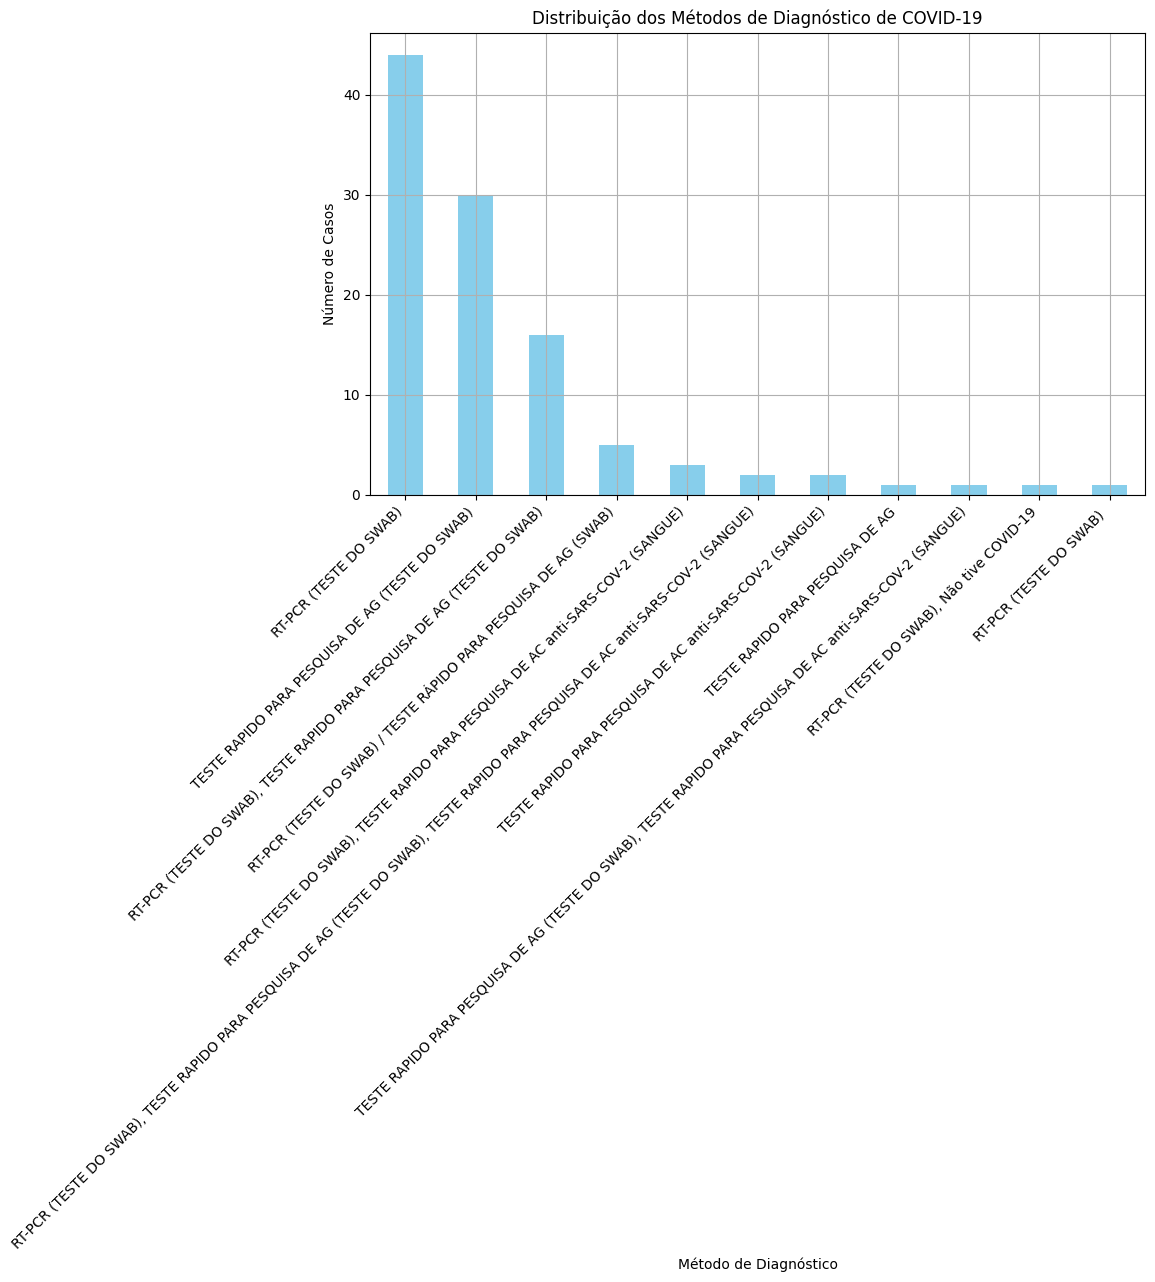

In [ ]:
# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
diagnosticos.plot(kind='bar', stacked=True, color='skyblue')
plt.xlabel('Método de Diagnóstico')
plt.ylabel('Número de Casos')
plt.title('Distribuição dos Métodos de Diagnóstico de COVID-19')

plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()


# Conclusão



A análise abrangente da nossa base de dados revelou insights valiosos sobre a composição da população que passou pelos testes de COVID-19, abordando dados demográficos, resultados dos testes sorológicos, diagnóstico de infecção, imunização e sintomas relatados. Aqui estão alguns dos principais pontos destacados:

* **Distribuição de Gênero**: A base de dados é composta por 194 indivíduos, com 30.41% do sexo masculino e 69.59% do sexo feminino. Essa distribuição de gênero fornece uma visão da representatividade na amostra.

* **Distribuição de Idade**: A análise da idade da amostra revelou uma ampla distribuição etária. A faixa etária mais comum é de 21 anos, seguida de perto pela faixa de 25 anos, indicando uma concentração significativa de indivíduos nessas idades.

* **Resultados dos Testes Sorológicos**: A análise dos resultados dos testes sorológicos mostrou que a maioria das pessoas apresentou resultados de IgG(+) IgM(-), indicando uma exposição passada ao vírus. No entanto, também identificamos indivíduos com resultados de IgG(-) IgM(-) e um caso de IgG(+) IgM(+), que sugere uma infecção recente ou atual.

* **Diagnóstico de Infecção**: A análise dos resultados dos testes de infecção revelou um número considerável de casos positivos, com mais pessoas do sexo feminino testando positivo. Esses dados são essenciais para entender a disseminação da infecção na população.

* **Sintomas Relatados**: Entre as pessoas imunizadas, identificamos uma variedade de sintomas relatados, com tosse, dor no corpo e febre sendo os mais frequentes. A presença de indivíduos assintomáticos também foi notada.

* **Imunização**: Foi possível determinar que o imunizante Pfizer foi o mais amplamente utilizado na população estudada, seguido de perto pela AstraZeneca e pela Coronavac. Além disso, observamos que um número significativo de pessoas recebeu apenas uma dose, provavelmente devido a esquemas de vacinação específicos ou circunstâncias individuais.

* **Diagnóstico de COVID-19**: A análise dos métodos de diagnóstico usados por pessoas que já tiveram COVID-19 demonstrou uma variedade de abordagens, com os testes RT-PCR e os testes rápidos de antígeno (Swab) sendo os mais comuns. Essa diversidade reflete a disponibilidade de diferentes testes para a detecção da doença.

* **Exposição ao Vírus**: A identificação de pessoas que desenvolveram anticorpos IgG em resposta à exposição prévia ao SARS-CoV-2 é importante para compreender a disseminação do vírus na população. Além disso, a ausência de anticorpos IgM em grande parte dos casos sugere que a maioria das pessoas não estava atualmente infectada.

Essa análise fornece uma visão abrangente da nossa amostra e é fundamental para o acompanhamento da saúde pública, a pesquisa epidemiológica e o desenvolvimento de estratégias eficazes no combate à pandemia da COVID-19. Manter os registros atualizados e de alta qualidade é essencial para tomar decisões informadas e implementar medidas preventivas e de tratamento eficazes.

# Referencial Teórico

* https://pandas.pydata.org/docs/
* https://plotly.com/python/
* https://chat.openai.com